In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_circles

In [40]:
x,y=make_circles(n_samples=500,noise=0.1,factor=0.3)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
x_scaled=scaler.fit_transform(x)

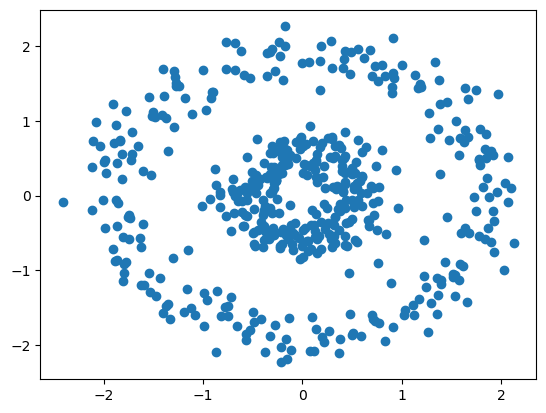

In [44]:
plt.scatter(x_scaled[:,0],x_scaled[:,1])

## Anomaly Detection using DBSCAN bcz DBSCAN works well with non-linear data

In [45]:
from sklearn.cluster import DBSCAN

In [50]:
dbscan=DBSCAN(eps=0.3)

In [51]:
dbscan.fit(x_scaled)

DBSCAN(eps=0.3)

In [52]:
dbscan.labels_

array([ 0,  0,  1,  0,  2,  2,  0,  1,  2,  0,  0,  0,  0,  2,  1,  0,  1,
        0,  2,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,
        2,  1,  0, -1,  0,  0,  0,  2,  0,  0,  0,  0,  2,  0,  0,  2,  0,
        2,  0,  0,  1,  2,  0,  2,  0,  2,  2,  1,  0,  0,  0, -1,  1,  2,
        0,  1,  2,  0,  0,  1,  2,  2,  0,  0,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  2,  0,  2,  0,  1,  0,  1,  0,  1,  0,  0,  0,  2,
        2,  0,  0,  1,  1,  1,  0,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        2,  1,  0,  2,  0,  0,  2,  2,  0,  2,  2,  0,  0,  1,  2,  0,  2,
        0,  1,  0, -1,  0,  2,  0,  1,  2,  0,  2,  0,  0,  2,  1,  0,  1,
        0,  0,  2,  0,  1,  0,  2,  0,  2,  2,  0,  0,  1,  2,  2,  1,  2,
        2,  1,  2,  2, -1,  0,  0,  0,  2,  0,  0,  2,  0,  1,  0,  0,  0,
        0, -1,  0,  0,  0,  1,  1,  0,  2,  0,  0,  2,  2,  1,  2,  0,  0,
        2,  0,  0,  2,  2,  0,  2,  0,  2,  0,  2,  2,  2,  2,  2,  0,  0,
        1,  1,  2,  0,  2

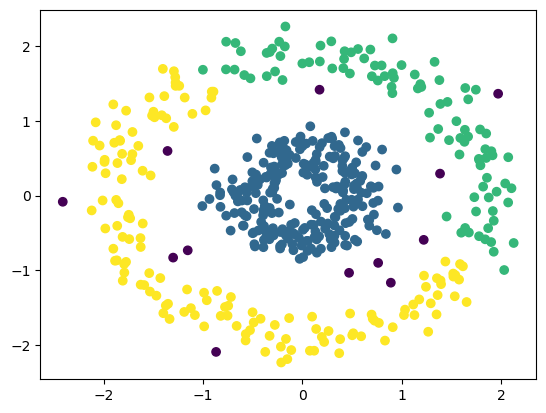

In [53]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=dbscan.labels_)

## Using IsolationForest

In [55]:
df=pd.read_csv('healthcare.csv')

In [56]:
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

In [59]:
df_scaled=scaler.fit_transform(df)

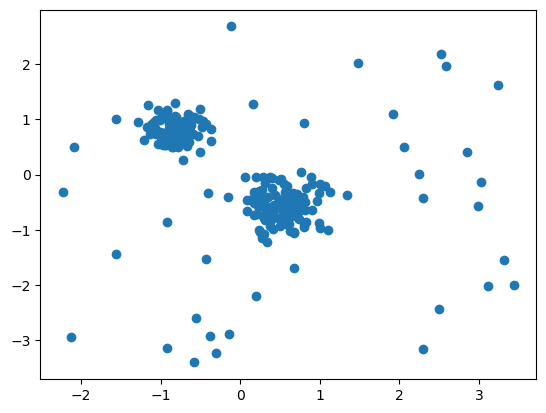

In [60]:
plt.scatter(df_scaled[:,0],df_scaled[:,1])

In [61]:
from sklearn.ensemble import IsolationForest

In [62]:
forest=IsolationForest()

In [63]:
forest.fit(df_scaled)

IsolationForest()

In [67]:
prd=forest.predict(df_scaled)

In [68]:
prd

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

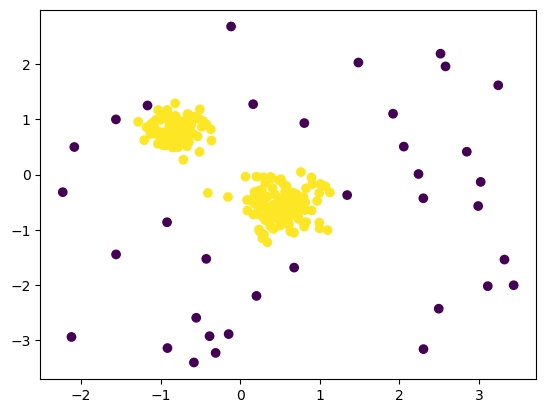

In [69]:
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=prd)

## Using Local Outlier Factor

## it works well with local outliers

In [70]:
## let's take iris dataset
from sklearn.datasets import load_iris

In [73]:
iris=load_iris()

In [76]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [74]:
x=iris.data

In [75]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [83]:
## now decompose it into two features
from sklearn.decomposition import PCA

In [84]:
pca=PCA(n_components=2)

In [87]:
iris_pca=pca.fit_transform(x)

In [88]:
iris_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [91]:
## now let's do feature scaling
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()

In [93]:
iris_pca_scaled=scaler.fit_transform(iris_pca)

In [94]:
iris_pca_scaled

array([[-1.30971087,  0.65054141],
       [-1.32435711, -0.36051227],
       [-1.40967409, -0.29522986],
       [-1.33958163, -0.64830449],
       [-1.33146886,  0.66552653],
       [-1.11293846,  1.50992585],
       [-1.37627274, -0.18221302],
       [-1.28141939,  0.33277896],
       [-1.4084016 , -1.17789289],
       [-1.30416299, -0.23173293],
       [-1.22325714,  1.3138624 ],
       [-1.2748859 ,  0.03000162],
       [-1.35947347, -0.47887104],
       [-1.57304515, -1.04159745],
       [-1.29049784,  2.40088235],
       [-1.16426043,  2.72533645],
       [-1.28014238,  1.65117453],
       [-1.29222826,  0.6351676 ],
       [-1.07339558,  1.7777797 ],
       [-1.26280003,  1.04600854],
       [-1.12728243,  0.79708495],
       [-1.24119316,  0.88191703],
       [-1.56920777,  0.27184488],
       [-1.12361159,  0.20104806],
       [-1.14948296, -0.07593489],
       [-1.2231214 , -0.29740403],
       [-1.20465318,  0.26671917],
       [-1.25027614,  0.74896183],
       [-1.28795287,

In [96]:
## now let's import local outlier factor
from sklearn.neighbors import LocalOutlierFactor ## bcz it is based on knn

In [97]:
lof=LocalOutlierFactor(n_neighbors=5)

In [100]:
lof_pred=lof.fit_predict(iris_pca_scaled)

In [101]:
lof_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

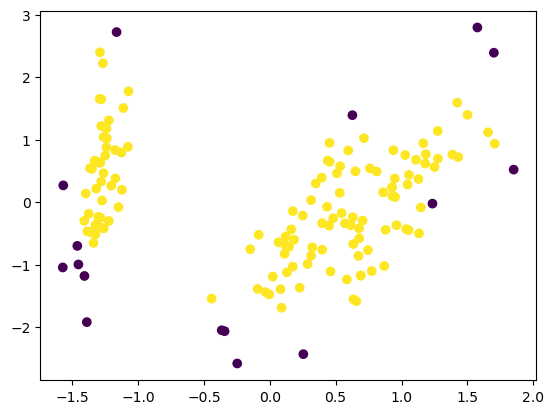

In [102]:
plt.scatter(iris_pca_scaled[:,0],iris_pca_scaled[:,1],c=lof_pred)